In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
import numpy as np

In [2]:
df = pd.read_csv('chucks/chuck_0.csv', sep=';')

In [3]:
# keep only these features
features = df[['RS_E_InAirTemp_PC1', 'RS_E_InAirTemp_PC2', 'RS_E_OilPress_PC1', 'RS_E_OilPress_PC2', 'RS_E_RPM_PC1', 'RS_E_RPM_PC2', 'RS_E_WatTemp_PC1', 'RS_E_WatTemp_PC2', 'RS_T_OilTemp_PC1', 'RS_T_OilTemp_PC2', 'temperature', 'precipitation', 'windspeed_10m', 'sum_pollen']]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [ ]:
eps_values = [1.5, 2]
min_samples_values = [20, 50]

best_score = -1
best_eps = 0
best_min_samples = 0

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1)
        labels = dbscan.fit_predict(features_scaled)
        score = silhouette_score(features_scaled, labels)
        
        print(f"Eps={eps}, Min Samples={min_samples}, Silhouette Score={score}")
        
        if score > best_score:
            best_score = score
            best_eps = eps
            best_min_samples = min_samples

print(f"Best Parameters: Eps={best_eps}, Min Samples={best_min_samples}, Silhouette Score={best_score}")


# eps_values = [0.1, 0.5, 1.0, 1.5]
# min_samples_values = [5, 10, 20]
# Eps=0.1, Min Samples=5, Silhouette Score=-0.44812748412393494
# Eps=0.1, Min Samples=10, Silhouette Score=-0.21109172141824437
# Eps=0.1, Min Samples=20, Silhouette Score=-0.21123978328834905
# Eps=0.5, Min Samples=5, Silhouette Score=-0.5479639931081108
# Eps=0.5, Min Samples=10, Silhouette Score=-0.5482374513163959
# Eps=0.5, Min Samples=20, Silhouette Score=-0.45101973715868254
# Eps=1.0, Min Samples=5, Silhouette Score=-0.3687515261185174
# Eps=1.0, Min Samples=10, Silhouette Score=-0.2974022792302073
# Eps=1.0, Min Samples=20, Silhouette Score=-0.17053598766060346
# Eps=1.5, Min Samples=5, Silhouette Score=0.009379772046798357
# Eps=1.5, Min Samples=10, Silhouette Score=0.05709655658986091
# Eps=1.5, Min Samples=20, Silhouette Score=0.06642544233059569
# Best Parameters: Eps=1.5, Min Samples=20, Silhouette Score=0.06642544233059569


# eps_values = [1.5, 2]
# min_samples_values = [20, 50]
# Eps=1.5, Min Samples=20, Silhouette Score=0.06642544233059569
# Eps=1.5, Min Samples=50, Silhouette Score=0.03251506592649707
# Eps=2, Min Samples=20, Silhouette Score=0.16660320632658981
# Eps=2, Min Samples=50, Silhouette Score=0.2664896218838388
# Best Parameters: Eps=2, Min Samples=50, Silhouette Score=0.2664896218838388

In [7]:
epsilon = 1.5
min_samples = 20

dbscan = DBSCAN(eps=epsilon, min_samples=min_samples, n_jobs=-1)

#clusters = dbscan.fit_predict(features_scaled)

dbscan.fit(features_scaled)
clusters = dbscan.labels_

df['cluster'] = clusters

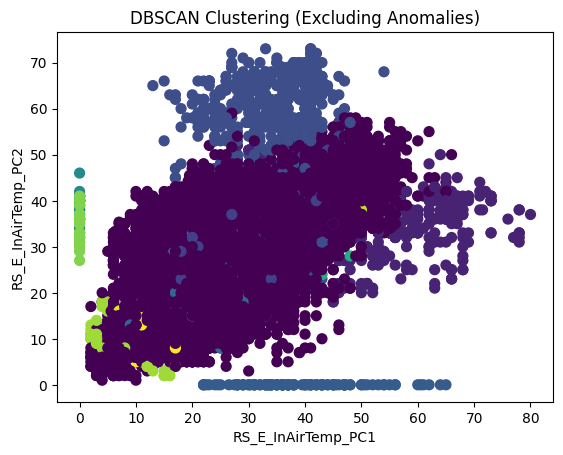

In [8]:
# Keep only values assigned to a cluster
valid_clusters = clusters != -1
valid_data = df[valid_clusters]

plt.scatter(valid_data["RS_E_InAirTemp_PC1"], valid_data["RS_E_InAirTemp_PC2"], c=clusters[valid_clusters], cmap='viridis', s=50)

plt.title('DBSCAN Clustering (Excluding Anomalies)')
plt.xlabel('RS_E_InAirTemp_PC1')
plt.ylabel('RS_E_InAirTemp_PC2')
plt.show()

In [9]:
# Calculate the mean of each cluster
cluster_means = df.groupby('cluster').mean()

# Print the cluster means
print("Cluster Means:")
cluster_means

Cluster Means:


C:\Users\Ben\AppData\Local\Temp\ipykernel_16584\1262415500.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = df.groupby('cluster').mean()


,mapped_veh_id,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2,temperature,precipitation,windspeed_10m,sum_pollen
cluster,,,,,,,,,,,,,,,,,
-1,153.497715,50.887481,4.405801,27.638230,27.364029,310.362363,299.536340,911.421024,884.492803,64.633590,61.060276,66.478930,64.939089,12.289634,0.287349,13.986061,52.626070
0,151.596154,50.907293,4.246495,32.008559,31.931245,264.988547,274.680112,959.455137,960.498346,79.263152,78.735466,78.531823,78.423583,14.973679,0.096983,13.135687,20.399826
1,122.000000,50.945081,3.669018,37.806911,35.520325,182.160569,241.042683,804.973577,807.189024,81.739837,83.095528,82.451220,0.000000,19.427642,0.037805,9.797561,1.595122
2,154.840426,51.035091,4.472069,42.284954,35.386778,4.800912,238.505572,0.419453,910.875127,40.695542,80.163880,46.664387,81.460993,19.391489,0.018997,10.729331,4.827812
3,122.000000,50.940705,3.700668,41.412698,40.166667,288.531746,406.134921,1563.047619,1547.341270,86.500000,87.698413,88.238095,0.000000,19.750794,0.080952,9.873016,1.592063
4,131.000000,50.331010,4.418392,32.758319,35.064799,690.000000,690.000000,802.935201,805.350263,81.357268,80.884413,78.117338,79.539405,14.590193,0.022942,12.052715,18.400350
5,145.749511,51.037057,4.411210,33.372309,48.347847,225.561725,5.210372,805.359018,0.520059,80.056751,48.636986,78.483692,49.664547,16.982681,0.040802,12.777886,6.022896
6,164.000000,51.128423,5.044203,39.365782,0.000000,385.682891,0.000000,1681.868732,0.000000,84.191740,0.000000,83.199115,84.582596,18.274336,0.013274,11.643363,3.826549
7,195.696221,50.274763,4.482217,26.274467,28.459545,689.949128,248.491663,813.926561,804.960140,74.768871,75.742127,75.816231,76.812711,14.909302,0.017878,12.030087,7.927180


In [10]:
test_df = pd.read_csv('chucks/test.csv', sep=';')    # first 10 rows of chuck_1.csv

# remove unsused features
test_df = test_df.drop(['lat', 'lon', 'mapped_veh_id', 'timestamps_UTC'], axis=1)

test_df_scaled = scaler.transform(test_df) # scaled with the train set weights

In [28]:
distances, indices = NearestNeighbors(n_neighbors=1).fit(features_scaled).kneighbors(test_df_scaled)
outlier_threshold = 1

# Create an array of -1s with the same shape as distances
test_clusters = np.full(distances.shape, -1)

# Find the indices where distance is less than or equal to outlier_threshold
not_outlier_indices = np.where(distances <= outlier_threshold)

# For these indices, replace -1 with the corresponding cluster number
test_clusters[not_outlier_indices] = df["cluster"].iloc[indices[not_outlier_indices]]

In [29]:
test_df['cluster'] = test_clusters

In [30]:
test_df

,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2,temperature,precipitation,windspeed_10m,sum_pollen,cluster
0,25.0,31.0,186.0,203.0,797.0,798.0,83.0,81.0,89.0,85.0,9.3,0.0,18.1,165.2,0
1,36.0,38.0,165.0,210.0,831.0,771.0,86.0,89.0,87.0,89.0,9.3,0.0,18.1,165.2,0
2,36.0,35.0,248.0,441.0,951.0,1349.0,77.0,80.0,76.0,80.0,9.3,0.0,18.1,165.2,-1
3,24.0,11.0,341.0,255.0,801.0,798.0,57.0,67.0,54.0,65.0,9.3,0.0,18.1,165.2,0
4,49.0,33.0,175.0,224.0,875.5,842.0,78.0,79.0,79.0,82.0,9.3,0.0,18.1,165.2,0
5,19.0,11.0,255.0,317.0,804.0,798.0,69.0,65.0,64.0,55.0,9.3,0.0,18.1,165.2,0
6,20.0,25.0,251.0,217.0,796.0,802.0,72.0,78.0,73.0,80.0,9.3,0.0,18.1,165.2,0
7,21.0,26.0,203.0,207.0,799.0,794.0,82.0,81.0,81.0,82.0,9.3,0.0,18.1,165.2,0
8,23.0,11.0,345.0,251.0,801.0,801.0,57.0,68.0,53.0,64.0,9.3,0.0,18.1,165.2,0
9,20.0,39.0,227.0,269.0,801.0,796.0,83.0,81.0,82.0,82.0,9.3,0.0,18.1,165.2,0
